<b>Support Vector Machine</b>

<h3 style="color:#C0C0C0;text-align:center;font-size: smaller;">Applied Machine Learning and Data Mining - U26538</h3>

<br>
<h1 style="color:#800080;text-align:center;"> Practical Exercise (10)</h1>
<h2 style="color:#800080;text-align:center;">Machine Learning Algorithms: SVM & kNN</h2>

From moodle/ datasets, download the Ad Tracking dataset and upload it to your Jupyter directory.  Read DataSet Information to understand the data (https://www.kaggle.com/matleonard/feature-engineering-data).

Create a new Juypter notebook called practex10svm.

<ol>
<li>Describe the data in terms of data quality and characteristics.</li>
<li>Identify the target attributes and the objective of the prediction</li>
<li>Apply data Preprocessing</li>
<li>Build a Machine learning algorithms model using SVM Algorithm</li>
<li>Evaluate the model</li>
<li>Visualize the result</li>
</ol>

<b>K-Nearest Neighbour</b>

From moodle/ datasets, download the Glass dataset and upload it to your Jupyter directory.  Read the DataSet Information to understand the data (https://www.kaggle.com/uciml/glass).


Create a new Juypter notebook called practex10knn.

<ol>
<li>Describe the data in terms of data quality and characteristics.</li>
<li>Identify the target attributes and the objective of the prediction</li>
<li>Apply data Preprocessing (note that this dataset does not include categorical data)</li>
<li>Build a Machine learning algorithms model using KNN Algorithm</li>
<li>Evaluate the model</li>
<li>What is the best K value?</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('glass.csv')

In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.head(100)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
95,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.00,0.00,2
96,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.00,0.15,2
97,1.51743,12.20,3.25,1.16,73.55,0.62,8.90,0.00,0.24,2
98,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.00,0.00,2


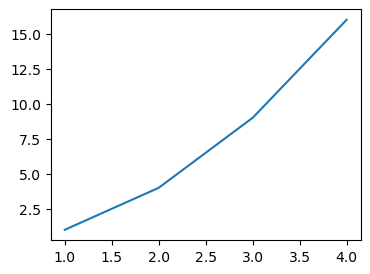

In [6]:
plt.figure(figsize=(4, 3))

# Add a plot to the figure
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

# Display the figure with the plot
plt.show()

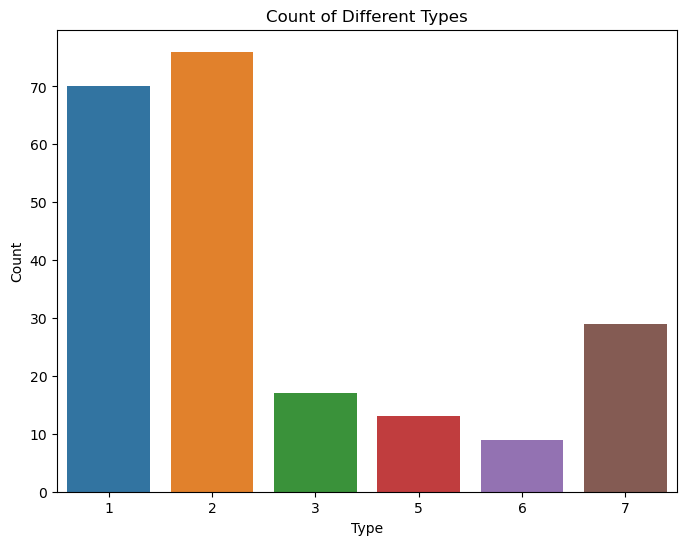

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df)
plt.title('Count of Different Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

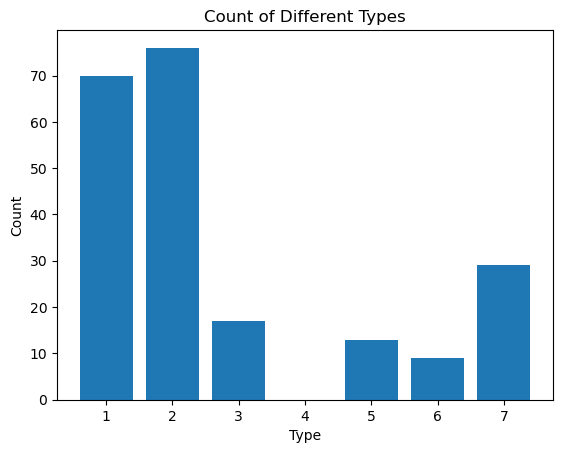

In [8]:
typeCounts =  df['Type'].value_counts()
plt.bar(typeCounts.index, typeCounts.values)
plt.title('Count of Different Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [9]:
typeCounts.values
typeCounts.index

Int64Index([2, 1, 7, 3, 5, 6], dtype='int64')

In [10]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [11]:
x= df.iloc[:,:9].values
y= df.iloc[:,-1:].values

In [12]:
df.iloc[:,-1:]

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [17]:
knn.fit(x_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [18]:
y_pred = knn.predict(x_test)
y_pred

array([7, 1, 2, 6, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 7, 1, 1, 1, 1, 5, 1,
       7, 1, 1, 1, 7, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 7, 2, 7, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 7, 1], dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0,  0,  0,  0],
       [ 9, 15,  0,  0,  0,  0],
       [ 4,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  1],
       [ 1,  0,  0,  0,  0,  6]], dtype=int64)

<Axes: >

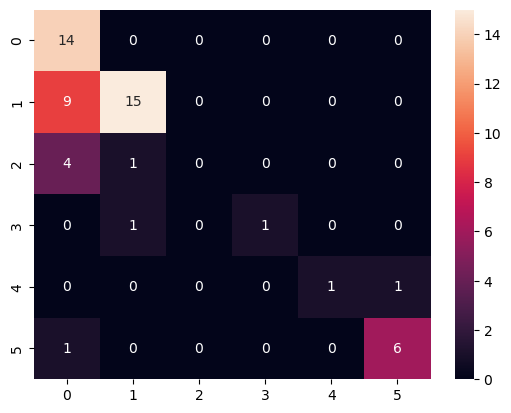

In [20]:
sns.heatmap(cm, annot=True)


In [21]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred)
ac*100

68.51851851851852

In [22]:
# try K=1 through K=5 and record testing accuracy
from sklearn import metrics


k_range = range(1, 10)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.6666666666666666, 0.6481481481481481, 0.6666666666666666, 0.6666666666666666, 0.6851851851851852, 0.6666666666666666, 0.6666666666666666, 0.6481481481481481, 0.6296296296296297]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Text(0, 0.5, 'Testing Accuracy')

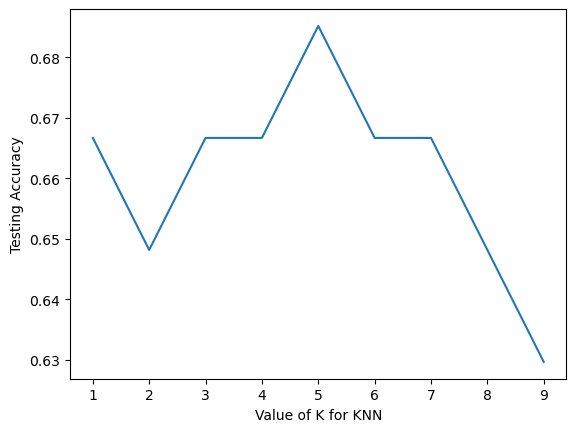

In [23]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')